<a href="https://colab.research.google.com/github/TriptSharma/What-s-Cooking/blob/master/Whats_Cooking!_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What's cooking kernel !

In [0]:
import numpy as np
import re
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
#from sklearn.neighbors import KNeighborsClassifier  
#from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier


Load the dataset

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.json to train.json


In [0]:
df = pd.read_json("train.json")
# testset = pd.read_json("test.json")

In [0]:
df.head()

In [0]:
#testset.head()

Check for any null values.

In [0]:
df.isnull().sum()

cuisine        0
id             0
ingredients    0
dtype: int64

In [0]:
testset.isnull().sum()

id             0
ingredients    0
dtype: int64

Check different types of cuisines

In [0]:
df.cuisine.unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [0]:
#get the count of recipes in each cuisine
#new_df = df[['id','cuisine']].groupby('cuisine').count()
#print(new_df, df['cuisine'].unique())

#get the average no. of ingredients in a cuisine
df['num_ingredients'] = df['ingredients'].apply(len)
df = df[df['num_ingredients'] > 1]
new_df = df[['num_ingredients','cuisine']].groupby('cuisine').agg(['mean', 'std'])
print(new_df)
new_df.to_csv('ingredient-cuisine.csv')

             num_ingredients          
                        mean       std
cuisine                               
brazilian           9.520343  5.555139
british             9.708955  4.165011
cajun_creole       12.617076  4.611601
chinese            11.982791  4.042125
filipino           10.000000  3.855135
french              9.824508  4.139205
greek              10.189949  3.721397
indian             12.729396  4.994374
irish               9.299850  3.700505
italian             9.910170  3.805620
jamaican           12.214829  4.763897
japanese            9.753521  4.231308
korean             11.284337  3.878880
mexican            10.880516  4.657652
moroccan           12.909866  4.799813
russian            10.224949  4.051223
southern_us         9.636953  3.867620
spanish            10.442756  4.143412
thai               12.568359  4.386448
vietnamese         12.689320  5.243577


# Text Data processing

Convert the ingredients to string.

In [0]:
df.ingredients = df.ingredients.astype('str')
# testset.ingredients = testset.ingredients.astype('str')

In [0]:
import plotly.plotly as py
import plotly.graph_objs as go



new_df.to_csv('grouped.csv')
data = [go.Bar(
            x=df['cuisine'].sort_values(),
            y=new_df['id']
    )]

py.iplot(data, filename='basic-bar')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: ignored

In [0]:
df.ingredients[0]

"'romaine lettuce 'black olive 'grape tomato 'garlic 'pepper 'purple onion 'seasoning 'garbanzo bean 'feta cheese crumbles"

In [0]:
testset.ingredients[0]


"'baking powder 'eggs 'all purpose flour 'raisins 'milk 'white sugar"

Lets remove those unnecessary symbols, which might be problem when tokenizing and lemmatizing

In [0]:
df.ingredients = df.ingredients.str.replace("["," ")
df.ingredients = df.ingredients.str.replace("]"," ")
df.ingredients = df.ingredients.str.replace("'"," ")
df.ingredients = df.ingredients.str.replace(","," ")

In [0]:

testset.ingredients = testset.ingredients.str.replace("["," ")
testset.ingredients = testset.ingredients.str.replace("]"," ")
testset.ingredients = testset.ingredients.str.replace("'"," ")
testset.ingredients = testset.ingredients.str.replace(","," ")

In [0]:
df.ingredients[0]

In [0]:
testset.ingredients[0]

' baking powder  eggs  all purpose flour  raisins  milk  white sugar'

Convert everything to lower ( I think they are already in lower case, but to be on safe side).

In [0]:
df.ingredients = df.ingredients.str.lower()
# testset.ingredients = testset.ingredients.str.lower()

Lets TOKENIZE the data now. (the processing of splitting into individual words)

In [0]:
import nltk

nltk.download(['punkt', 'wordnet'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
df.ingredients = df.ingredients.apply(lambda x: word_tokenize(x))
testset.ingredients = testset.ingredients.apply(lambda x: word_tokenize(x))

NameError: ignored

Lets LEMMATIZE the data now (Since i believe that dataset might have different representation of same words, like the olives and olive, tomatoes and tomato, which represent the same word)

In [0]:
lemmatizer = WordNetLemmatizer()

In [0]:
def preprocess(ingredients):
    ingredients_text = ' '.join(ingredients)
    ingredients_text = ingredients_text.lower()
    ingredients_text = ingredients_text.replace('-', ' ')
    words = []
    for word in ingredients_text.split():
        if re.findall('[0-9]', word): continue
        if len(word) <= 2: continue
        if '’' in word: continue
        word = lemmatizer.lemmatize(word)
        if len(word) > 0: words.append(word)
    return ' '.join(words)


def lemmat(wor):
    l = []
    for i in wor:
        l.append(lemmatizer.lemmatize(i))
    return l

In [0]:
df.ingredients = df.ingredients.apply(preprocess)
# testset.ingredients = testset.ingredients.apply(preprocess)

In [0]:
df.ingredients[0]

In [0]:
testset.ingredients[0]

'baking powder egg all purpose flour raisin milk white sugar'

Observe that olives converted to olive, tomatoes to tomato etc, many words are now in their root form.

In [0]:
type(df.ingredients[0])

str

'romaine lettuce black olive grape tomato garlic pepper purple onion seasoning garbanzo bean feta cheese crumbles'

Now our data looks good for vectorization.

In [0]:
#vect = HashingVectorizer ()
vect = TfidfVectorizer()

#vect = CountVectorizer()

In [0]:
features = vect.fit_transform(df.ingredients)

In [0]:
print(type(features))

NameError: ignored

So, now our features has 2826 features, which are created by the process of vectorization.

Lets visualize some random features.

In [0]:
#vect.get_feature_names()

from scipy.sparse import csc_matrix
def sparsity_ratio(X):
    X = csc_matrix.toarray(X)
    #print(X)
    return 1.0 - np.count_nonzero(X) / float(X.shape[0] * X.shape[1])
print("input sparsity ratio:", sparsity_ratio(features))


input sparsity ratio: 0.9930973579171537


Lets vectorize our testset as well, we only tranform it with already fitted model

In [0]:
testfeatures = vect.transform(testset.ingredients)

In [0]:
testfeatures

<9944x2746 sparse matrix of type '<class 'numpy.float64'>'
	with 188929 stored elements in Compressed Sparse Row format>

Lets create our labels now, which is obviously cuisine column. Lets labelencode it so that they convert to numerical lables, which usually might give better prediction results. Not a necessary step tho

In [0]:
encoder = LabelEncoder()
labels = encoder.fit_transform(df.cuisine)

Lets split the dataset into training and testing parts

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

Check the shapes, to make sure.

In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31801, 2746) (7951, 2746) (31801,) (7951,)


# taken from here https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html and modified


In [0]:
import itertools
from matplotlib import pyplot as plt
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
     
    '''
This function is modified to show the color range as normalized to f1 score
both f1 score and class count are printed in the squares
    '''
    
    if normalize:
        cm_normal = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(20, 20))
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.imshow(cm_normal, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #using the raw cm so the counts are printed on the heat map
    normalize = False
    
#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
    thresh = cm_normal.max() / 2.

    for i, j in itertools.product(range(cm_normal.shape[0]), range(cm_normal.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_normal[i, j] > thresh else "black")
        plt.text(j, i+0.25, format(cm_normal[i, j], '.2f'),
         horizontalalignment="center",
         color="white" if cm_normal[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Data Modeling

In [0]:
logreg = LogisticRegression(C=10,solver='lbfgs', multi_class='multinomial',max_iter=1000, random_state=9)
logreg.fit(X_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=9, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print("Logistic Regression accuracy",logreg.score(X_test, y_test))

Logistic Regression accuracy 0.7869450383599548


In [0]:
y_predict = logreg.predict(X_test) 
y_predict_train = logreg.predict(X_train)

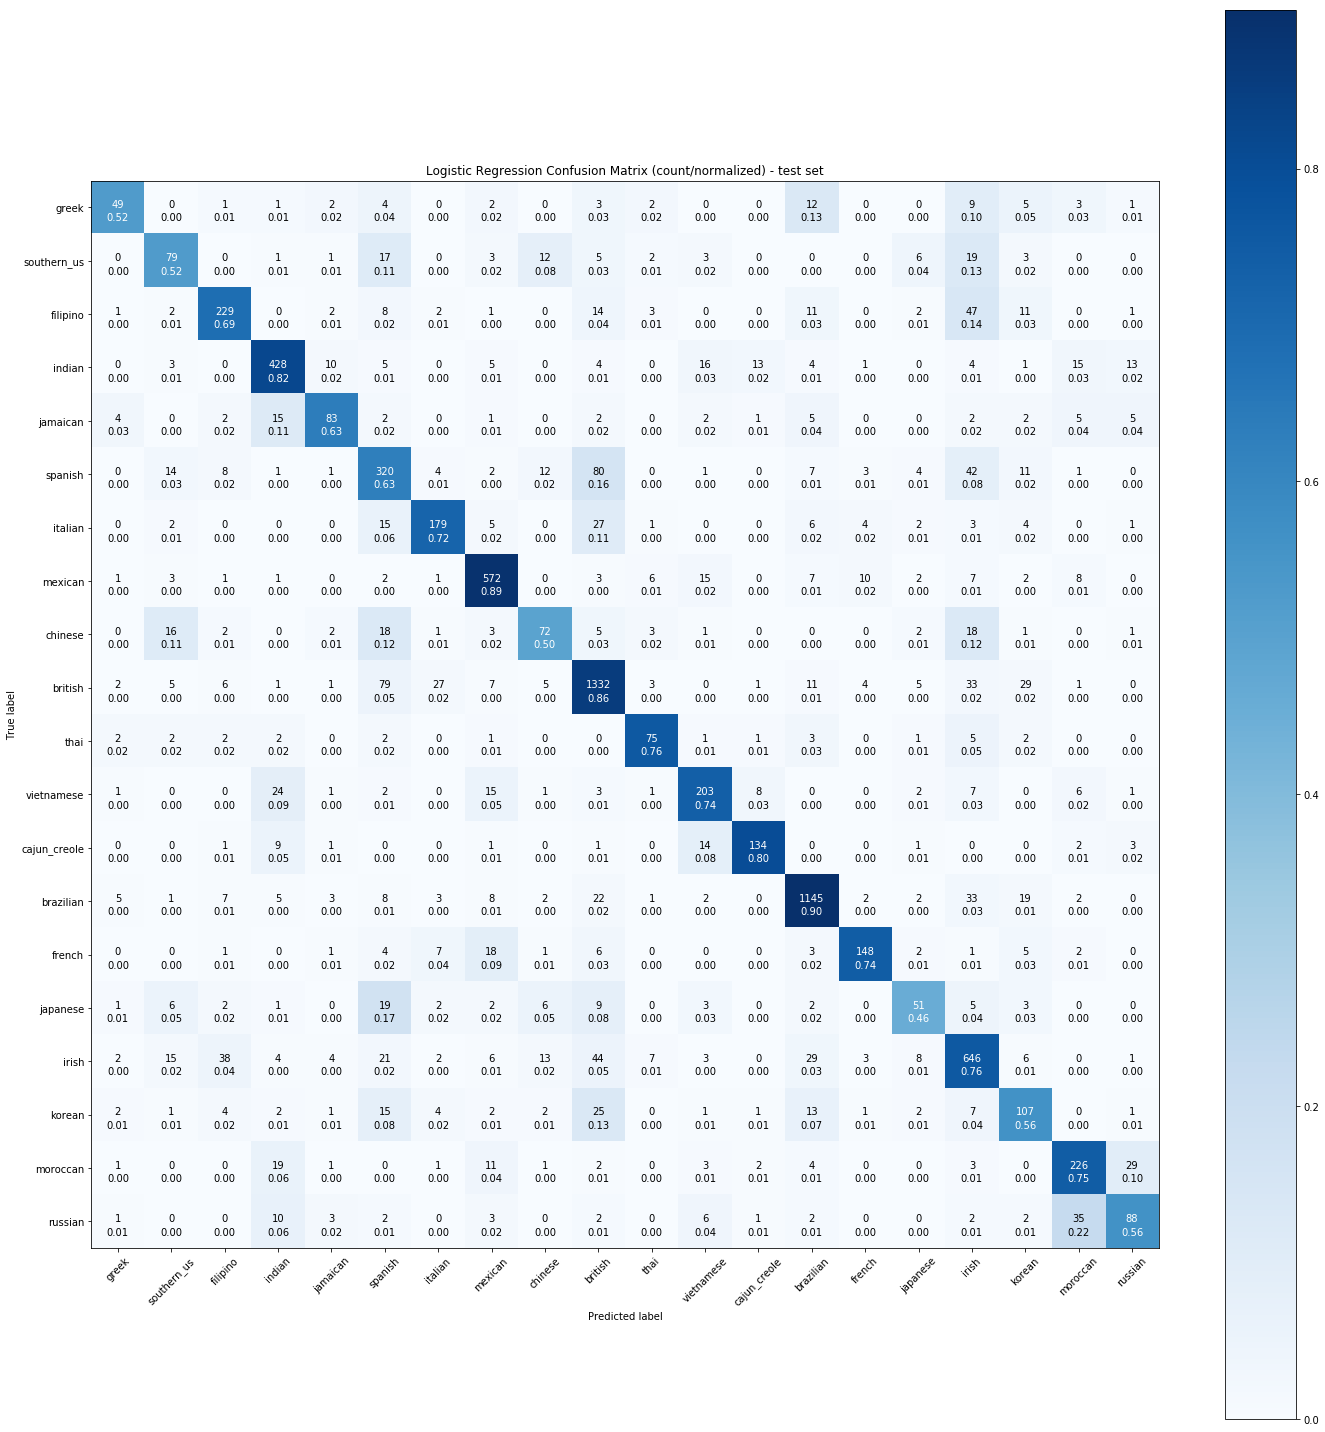

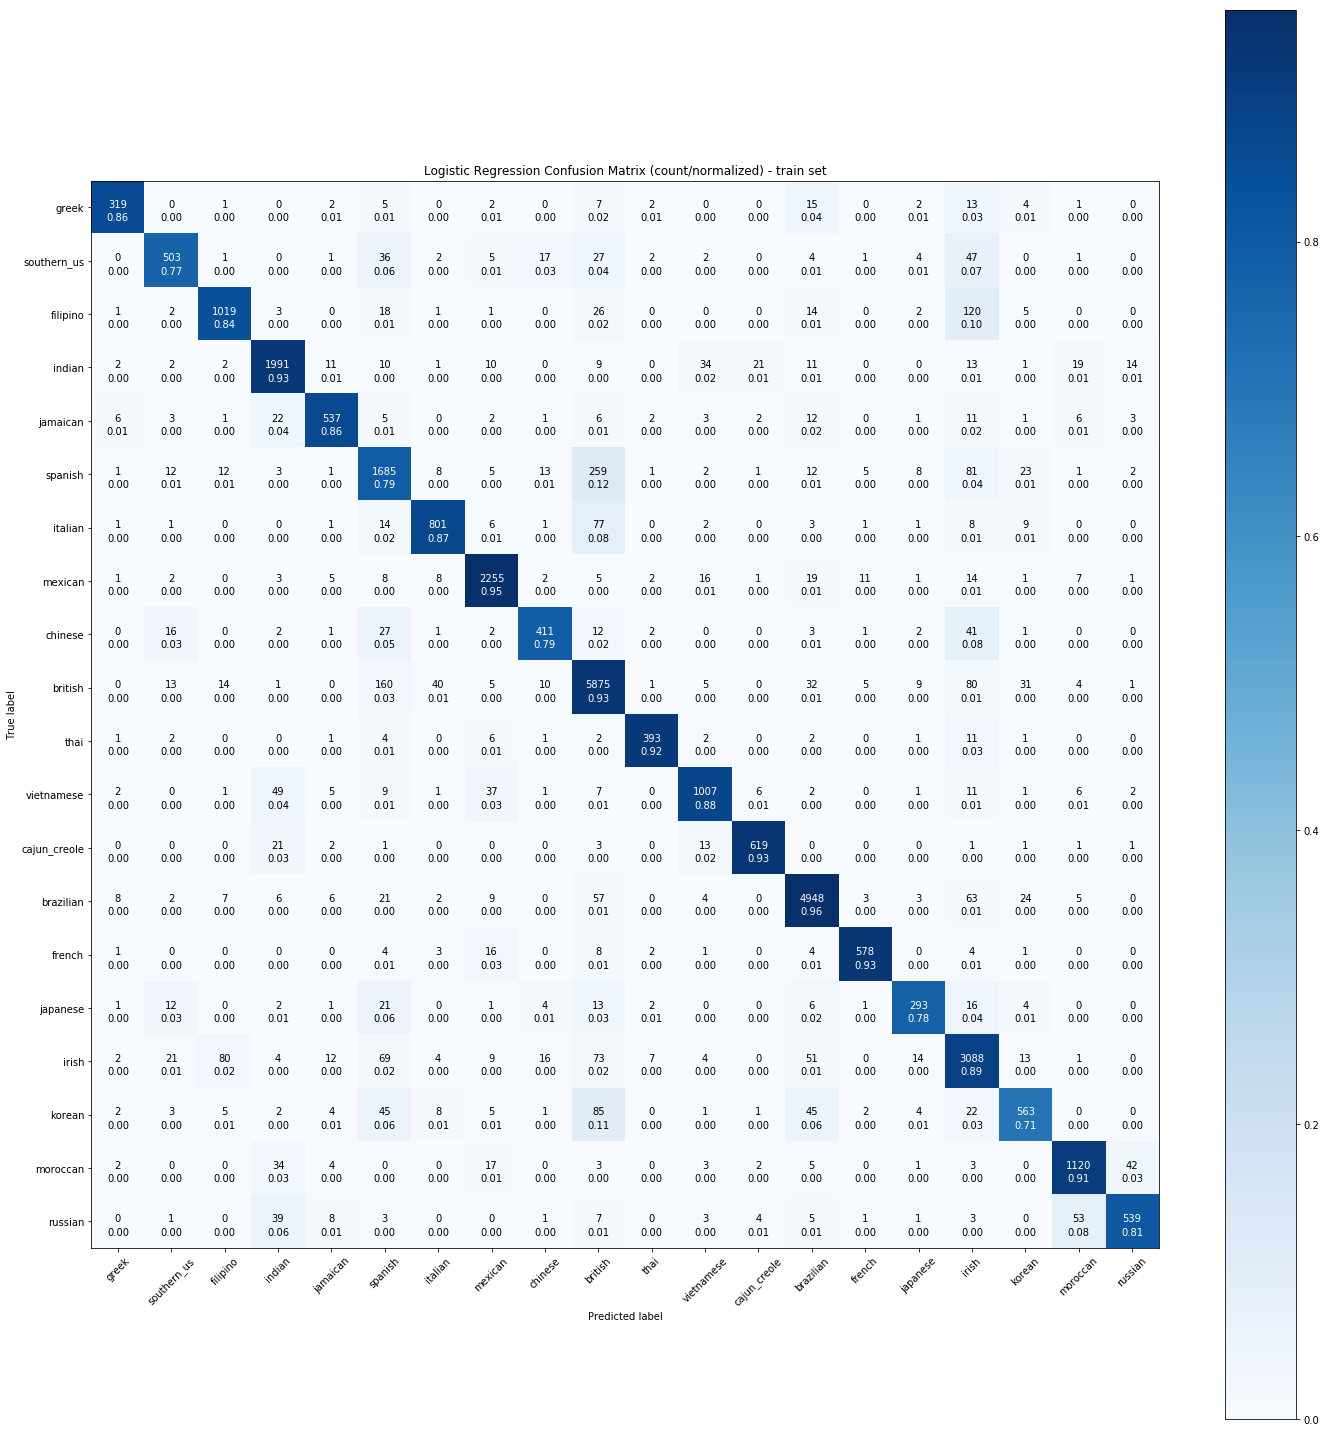

In [0]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from matplotlib import pyplot as plt

cm_lr_train = confusion_matrix(y_train, y_predict_train)
cm_lr_test = confusion_matrix(y_test, y_predict)

plot_confusion_matrix(cm_lr_test, classes=df.cuisine.unique(), normalize=True, title="Logistic Regression Confusion Matrix (count/normalized) - test set")
plot_confusion_matrix(cm_lr_train, classes=df.cuisine.unique(), normalize=True, title="Logistic Regression Confusion Matrix (count/normalized) - train set")


In [0]:
from sklearn import linear_model
sgd = linear_model.SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
print("SGD classifier accuracy",sgd.score(X_test, y_test))

SGD classifier accuracy 0.7719673161533627


In [0]:
from sklearn.svm import LinearSVC
linearsvm = LinearSVC(C=1.0,random_state=0,multi_class='crammer_singer',dual = False, max_iter = 1500)
linearsvm.fit(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1500,
          multi_class='crammer_singer', penalty='l2', random_state=0,
          tol=0.0001, verbose=0)

In [0]:
print("Linear SVM accuracy", linearsvm.score(X_test, y_test))

Linear SVM accuracy 0.7866750471401635


In [0]:
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1, verbose=1)
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.3min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [0]:
print('RF Accuracy: ', rf.score(X_test, y_test))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 110 out of 110 | elapsed:    0.3s finished


RF Accuracy:  0.7444374607165305


In [0]:
from sklearn.svm import SVC

estimator = logreg

adaboost = AdaBoostClassifier(estimator, n_estimators=500, learning_rate=0.1)
adaboost.fit(X_train, y_train)

In [0]:
print('RF Accuracy: ', adaboost.score(X_test, y_test))

RF Accuracy:  0.6798240100565682


Now, lets try our luck with neural networks.

# NEURAL NETWORK'S

I have tried both Keras and tensorflow (Of course the backend is same), but Keras code looks simpler and clear.

For Neural Networks we need to have the dense array's as inputs and preferably one hot encoding for lables.
So, lets create lables.

In [0]:
labelsNN = df.cuisine

Convert it to one hot formatting, there are many ways to do, i prefer to do this way.

In [0]:
labelsNN = pd.get_dummies(labelsNN)

Convert it to arrays, you can do by values method or np.array() both are same

In [0]:
labelsNN = labelsNN.values

AttributeError: ignored

Here's how the one hot encoding looks like.

In [0]:
labelsNN[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

Our labels are ready, now we need the features, we have already created the features above but it was sparse matrix, which neural network doesnt like, so convert to dense arrays.

In [0]:
from scipy.sparse import csr_matrix
sparse_dataset = csr_matrix(features)
featuresNN = sparse_dataset.todense()

Here's how the features look like.

In [0]:
featuresNN[0]

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [0]:
#FEATURE SCALING...

from sklearn import preprocessing
featuresNN_scaled = pd.DataFrame(preprocessing.scale(featuresNN))


Split the dataset.

In [0]:
X_trainNN, X_testNN, y_trainNN, y_testNN = train_test_split(featuresNN_scaled, labelsNN, test_size=0.2)

In [0]:
print(X_trainNN.shape, X_testNN.shape, y_trainNN.shape, y_testNN.shape)

(31801, 2746) (7951, 2746) (31801, 20) (7951, 20)


In [0]:
numfeat = X_trainNN.shape[1]

# KERAS

In [0]:
import keras
from keras.layers import *

Using TensorFlow backend.


A sequential NN with 300,500 and 400 nodes in first,second and third layers resp.

The loss is categorical cross entropy and the optimizer is adam with default learning rate.
We can tweak a lot of parameters like the no of nodes, epochs, batchsize etc to improve accuracy.

In [0]:
model = keras.models.Sequential()
model.add(Dense(128,input_dim = numfeat,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(20,activation='softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['categorical_accuracy'])
model.fit(X_trainNN,y_trainNN,epochs=50,shuffle=True, verbose =2,batch_size=512)

Epoch 1/50
 - 1s - loss: 2.0625 - categorical_accuracy: 0.4284
Epoch 2/50
 - 1s - loss: 1.1508 - categorical_accuracy: 0.6668
Epoch 3/50
 - 1s - loss: 0.8914 - categorical_accuracy: 0.7367
Epoch 4/50
 - 1s - loss: 0.7638 - categorical_accuracy: 0.7719
Epoch 5/50
 - 1s - loss: 0.6688 - categorical_accuracy: 0.7984
Epoch 6/50
 - 1s - loss: 0.6150 - categorical_accuracy: 0.8127
Epoch 7/50
 - 1s - loss: 0.5677 - categorical_accuracy: 0.8268
Epoch 8/50
 - 1s - loss: 0.5311 - categorical_accuracy: 0.8367
Epoch 9/50
 - 1s - loss: 0.4946 - categorical_accuracy: 0.8457
Epoch 10/50
 - 1s - loss: 0.4624 - categorical_accuracy: 0.8571
Epoch 11/50
 - 1s - loss: 0.4436 - categorical_accuracy: 0.8620
Epoch 12/50
 - 1s - loss: 0.4220 - categorical_accuracy: 0.8679
Epoch 13/50
 - 1s - loss: 0.4016 - categorical_accuracy: 0.8743
Epoch 14/50
 - 1s - loss: 0.3805 - categorical_accuracy: 0.8812
Epoch 15/50
 - 1s - loss: 0.3671 - categorical_accuracy: 0.8857
Epoch 16/50
 - 1s - loss: 0.3611 - categorical_ac

In [0]:
print("Accuracy with KERAS" ,model.evaluate(X_testNN,y_testNN)[1])

7951/7951 [==============================] - 0s 62us/step
Accuracy with KERAS 0.7641806062205515


In [0]:
y_predict_NN = model.predict(X_test) 
y_predict_train_NN = model.predict(X_train)

y_predict = np.argmax(y_predict_NN, axis=1)
y_predict_train = np.argmax(y_predict_train_NN, axis=1)

y_trainN = np.argmax(y_trainNN, axis=1)
y_testN = np.argmax(y_testNN, axis=1)

print(y_predict, y_predict.shape, y_predict_train.shape)

[ 9  9 13 ... 13  9  9] (7951,) (31801,)


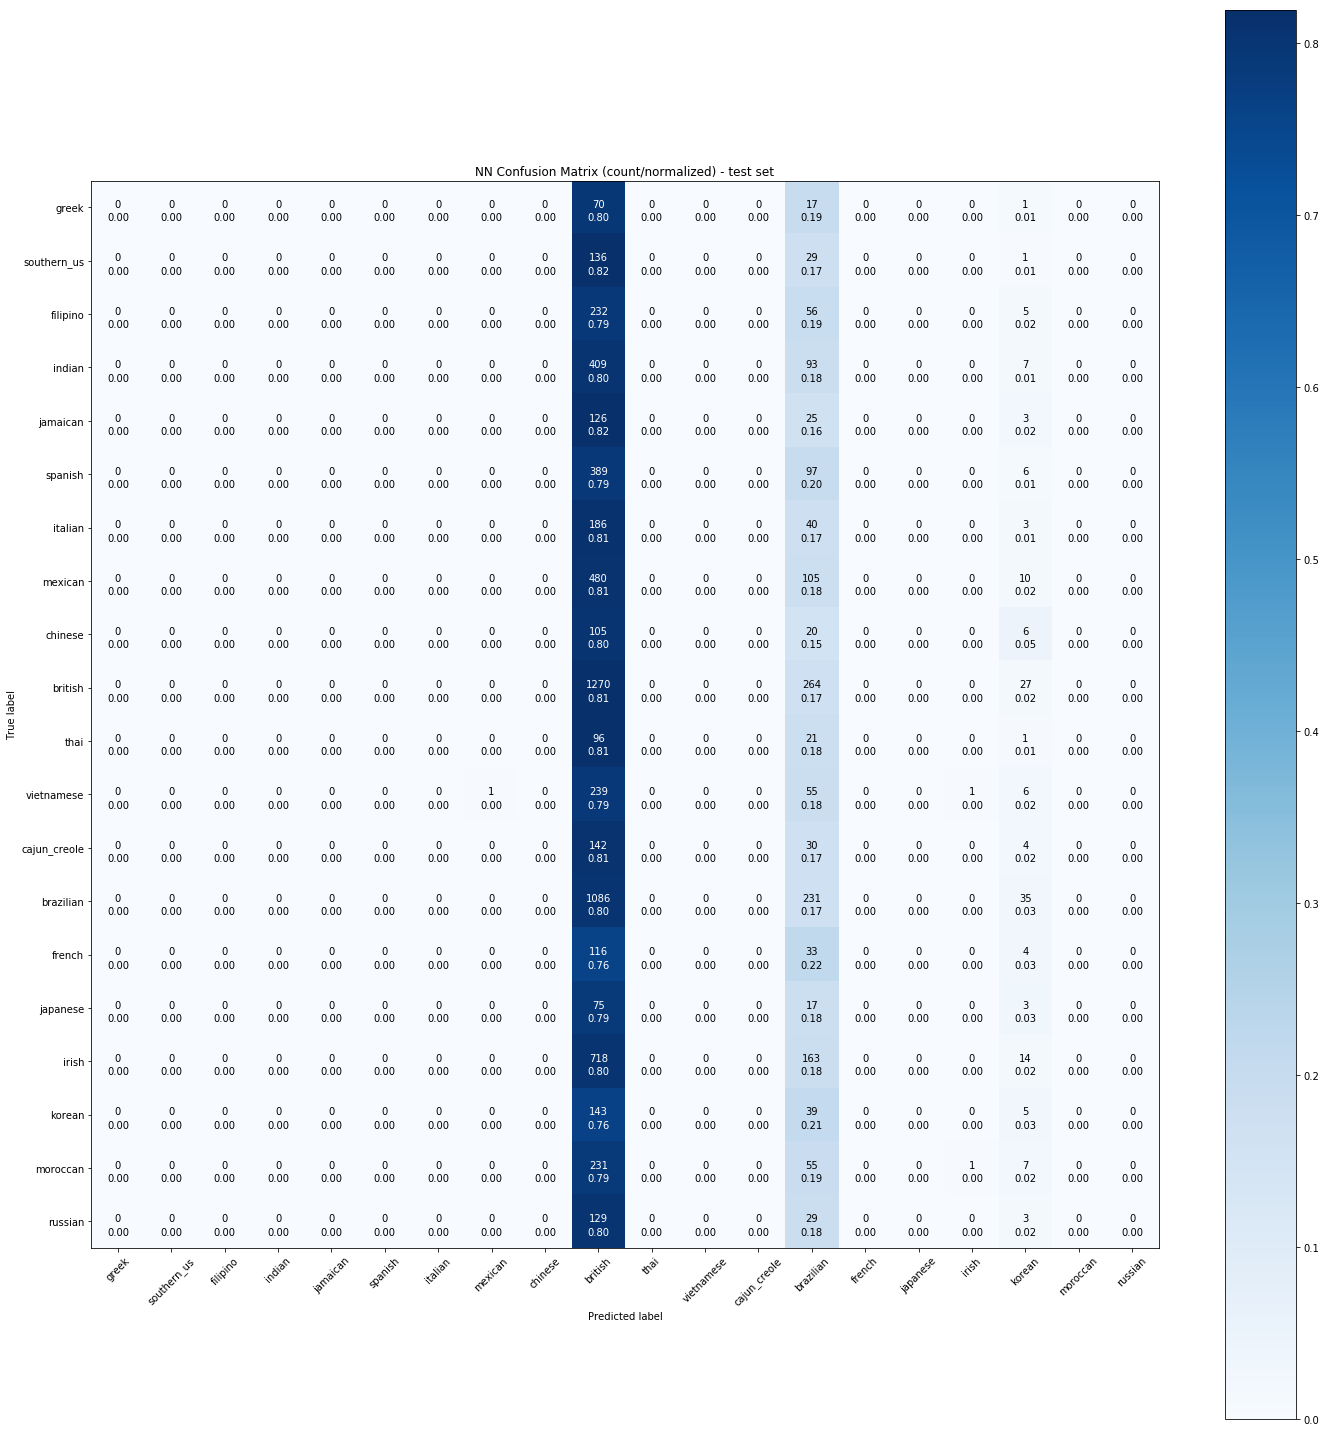

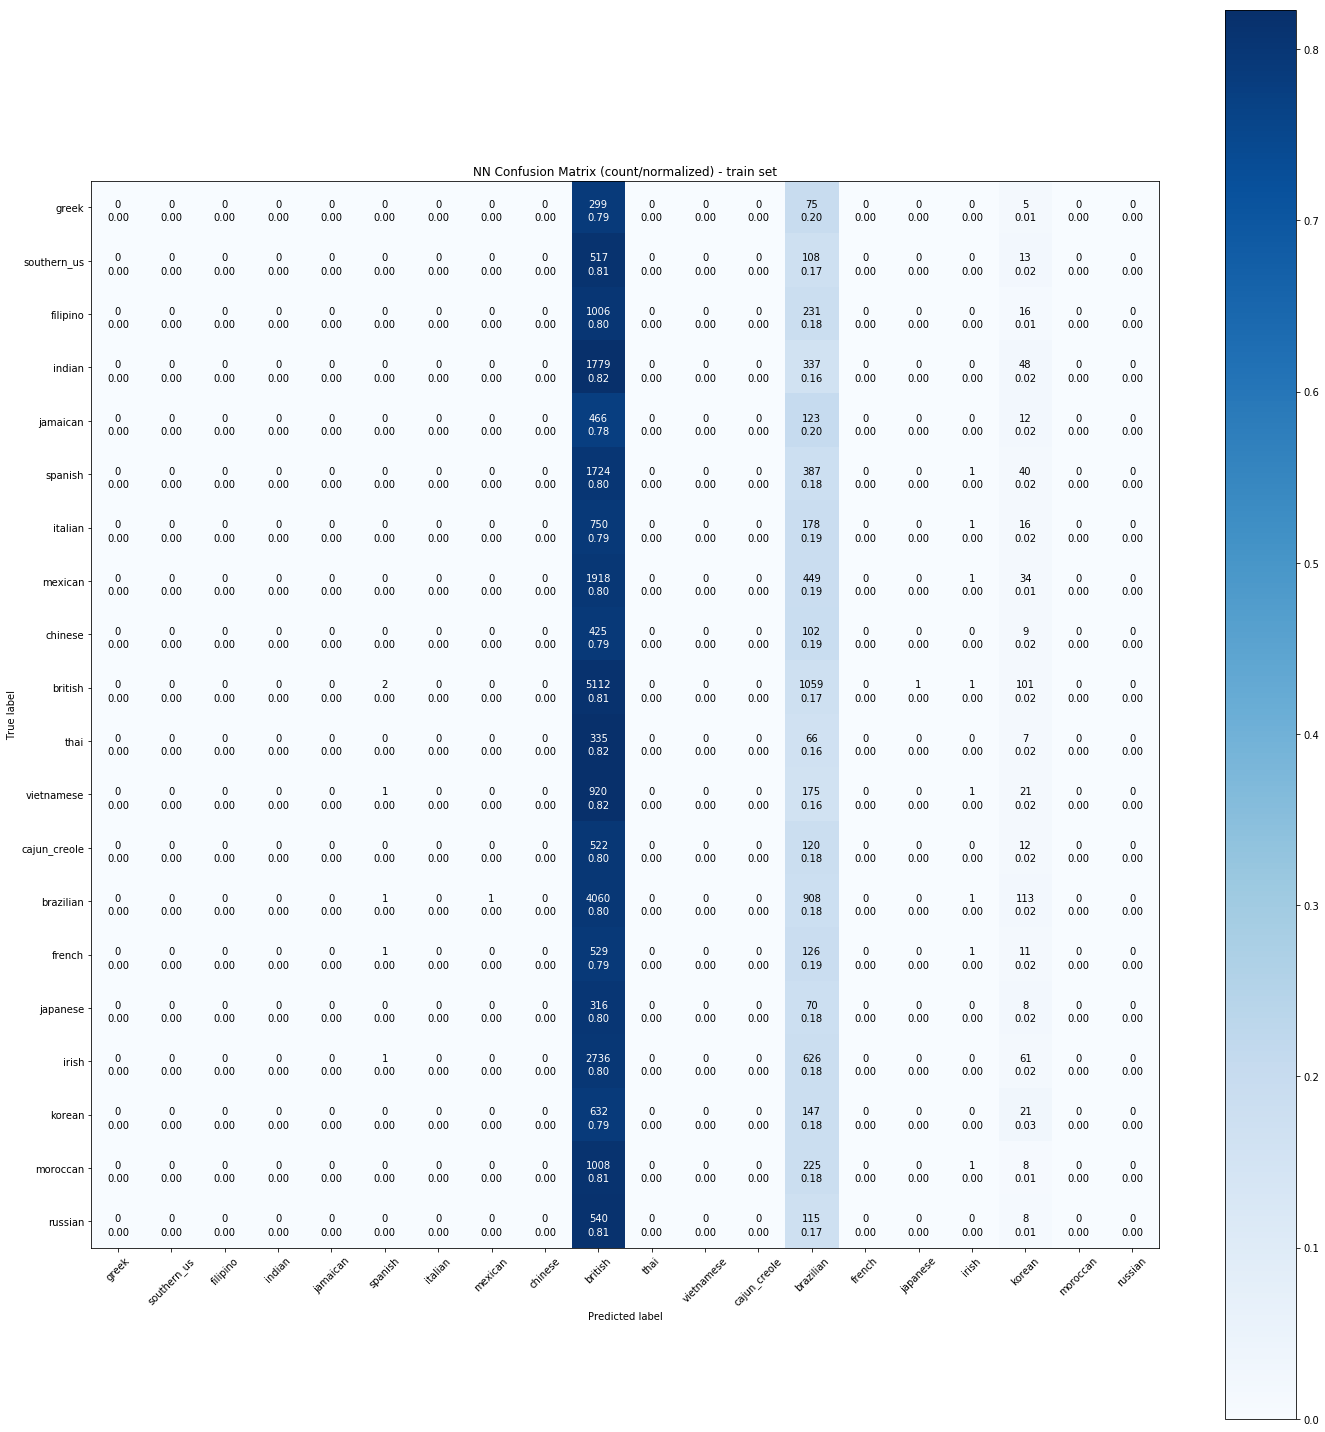

In [0]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from matplotlib import pyplot as plt

cm_lr_train = confusion_matrix(y_trainN, y_predict_train)
cm_lr_test = confusion_matrix(y_testN, y_predict)

plot_confusion_matrix(cm_lr_test, classes=df.cuisine.unique(), normalize=True, title="NN Confusion Matrix (count/normalized) - test set")
plot_confusion_matrix(cm_lr_train, classes=df.cuisine.unique(), normalize=True, title="NN Confusion Matrix (count/normalized) - train set")


Now, we have achieved almost similar accuracies in all the above models, I dont prefer NN's on this data as it is computationally very expensive.

# PREDICTION

I prefer just using the logisticRegression or linearsvm for predictions, but linearSVC also has almost same results.
I'm not predict using Keras or Tensorflow, since it needs an extra two steps to convert the labels, which I dont want to waste my time on.

In [0]:
from sklearn.svm import LinearSVC
linearsvmfinal = LinearSVC(C=1.0,random_state=0,multi_class='crammer_singer',dual = False, max_iter = 1500)
linearsvmfinal.fit(features,labels)

KeyboardInterrupt: ignored

In [0]:
import lightgbm as lgb

In [0]:
gbm = lgb.LGBMClassifier(objective="mutliclass",n_estimators=1000,num_leaves=512)
gbm.fit(X_train,y_train,verbose = 300)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=512,
               objective='mutliclass', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [0]:
pred = gbm.predict(testfeatures)
score = gbm.score(X_test, y_test)

NameError: ignored

In [0]:
print(pred, " = gbm score")
#pred = linearsvmfinal.predict(testfeatures)

[ 8 16  9 ...  9 16 13]  = gbm score


In [0]:
predconv = encoder.inverse_transform(pred)

In [0]:
sub = pd.DataFrame({'id':testset.id,'cuisine':predconv})

In [0]:
output = sub[['id','cuisine']]

In [0]:
output.to_csv("outputfile.csv",index = False)

# GLM


In [0]:
print(X_train)

  (0, 1801)	0.3698691945465009
  (0, 835)	0.5405824208575255
  (0, 439)	0.3385102633064532
  (0, 413)	0.3011136302092494
  (0, 2187)	0.36781673471755566
  (0, 1371)	0.23980277885671175
  (0, 157)	0.33900564481354784
  (0, 2144)	0.13009157311562805
  (0, 217)	0.2026465909580251
  (1, 2010)	0.618680467840723
  (1, 506)	0.5475049077702863
  (1, 2211)	0.38597893291461505
  (1, 516)	0.2967483524102727
  (1, 939)	0.22423609556973131
  (1, 1701)	0.17364246834043953
  (2, 1983)	0.4622442134203914
  (2, 1055)	0.2436660332080564
  (2, 2443)	0.2659998098598789
  (2, 1809)	0.26835782439718747
  (2, 2517)	0.5024059659774719
  (2, 2605)	0.1847510130166887
  (2, 2303)	0.23714589223154595
  (2, 1392)	0.22159362694391654
  (2, 127)	0.19396947770236211
  (2, 534)	0.19200032132313638
  :	:
  (31817, 1701)	0.10478852470096277
  (31817, 1559)	0.1900684805971079
  (31817, 800)	0.16515179896409418
  (31817, 1089)	0.2705332664370053
  (31817, 909)	0.16485661587752506
  (31817, 2192)	0.24949404119240118
  (318

In [0]:
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_classif
from scipy.sparse import csr_matrix

sparse_dataset = csr_matrix(features)
features = sparse_dataset.todense()

#feature scaling
from sklearn import preprocessing
features_scaled = pd.DataFrame(preprocessing.scale(features))


encoder = LabelEncoder()
labels = encoder.fit_transform(df.cuisine)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2)


selector = SelectKBest(f_classif, k=50)
X_trainK = selector.fit_transform(X_train, y_train)
X_testK = selector.transform(X_test)


In [0]:
pip install scipy==1.2 --upgrade


     |████████████████████████████████| 26.6MB 1.4MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0


In [0]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, roc_auc_score

model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
model_results = model.fit()
model_results.predict(X_test)
y_pred_test = model_results.predict(X_test).reshape(-1,)
score = roc_auc_score(y_test, y_pred_test)
            
# y_pred = model_results.predict(X_test)

oof[valid_index] = y_pred_test.reshape(-1,)
scores.append(roc_auc_score(y_test, y_pred_test))

print(oof, prediction, scores)

/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/links.py:167: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


# NOTES:
1) You can achieve better accuracy by ensembling the model, i will update this very soon.
2) Neural Network has even scored an accuracy of 0.81 but the computation is very time taking.
3) I have not used my time on visualizing the dataset.(which is not needed for this submission).
4) Please comment for any questions, doubts or suggestions.

 THANK YOU
 
# please UPVOTE, if you like.